In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import pandas as pd

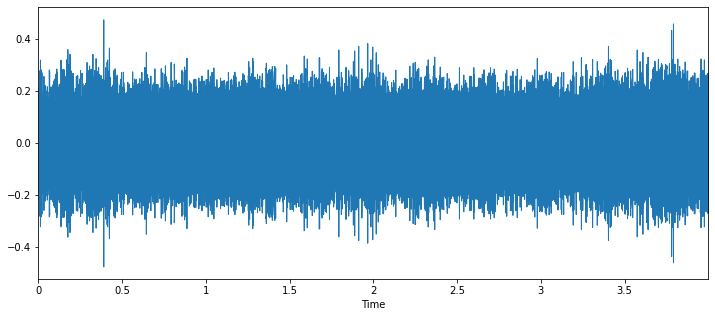

In [2]:
plt.figure(figsize = (12 , 5))
data , rate = librosa.load('C:\\Users\\User-1\\Desktop\\college\\projects\\Audio Classification using Deep Learning\\11.wav')
librosa.display.waveplot(data , sr = rate)
ipd.Audio('C:\\Users\\User-1\\Desktop\\college\\projects\\Audio Classification using Deep Learning\\11.wav')

In [3]:
print(rate)
data

22050


array([ 0.02371758,  0.04383013, -0.05752396, ..., -0.19349316,
       -0.11272494, -0.14792684], dtype=float32)

In [4]:
df = pd.read_csv('C:\\Users\\User-1\\Desktop\\college\\projects\\Audio Classification using Deep Learning\\train.csv')
df.head()

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark


In [5]:
df.shape

(5435, 2)

In [6]:
df['Class'].value_counts()

jackhammer          668
engine_idling       624
siren               607
street_music        600
dog_bark            600
air_conditioner     600
drilling            600
children_playing    600
car_horn            306
gun_shot            230
Name: Class, dtype: int64

### Extract Features

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [7]:
mfccs = librosa.feature.mfcc(y = data, sr = rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [8]:
import numpy as np
X = []
for i in df['ID']:
    audio , rate = librosa.load(('C:\\Users\\User-1\\Desktop\\college\\projects\\Audio Classification using Deep Learning\\Train\\') + (str(i)) + ('.wav'))
    mfccs_features = librosa.feature.mfcc(y=audio, sr=rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    X.append(mfccs_scaled_features)
    print(i)

0
1
2
3
4
6
10
11
12
15
17
18
19
20
22
24
26
27
32
33
35
36
37
38
40
42
43
44
45
46
47
48
49
50
52
54
56
57
59
60
61
63
65
66
67
68
71
72
74
76
77
78
79
80
81
82
83
84
87
88
90
91
92
93
97
99
100
101
103
104
105
113
114
116
117
118
119
120
121
123
125
128
130
131
132
134
135
136
137
138
139
140
142
146
148
149
152
153
159
160
162
163
164
165
167
168
170
171
172
174
175
176
178
179
182
184
185
186
187
188
189
192
193
196
197
200
202
208
211
212
213
214
215
216
217
218
219
221
222
223
224
226
227
228
229
230
232
233
235
236
239
242
245
246
247
248
249
250
251
252
253
255
258
260
261
263
264
268
269
270
271
272
275
276
277
278
280
282
285
286
288
295
299
300


C:\Users\User-1\Anaconda3\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]


301
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
322
323
324
326
327
328
329
330
331
332
333
334
335
336
337
338
339
342
343
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
363
364
365
366
367
368
369
370
371
372
374
376
377
378
380
381
382
383
385
386
388
391
392
394
395
396
397
400
401
402
406
407
408
410
411
412
413
414
417
418
419
423
425
426
427
428
429
430
435
436
437
438
440
442
444
445
446
447
449
450
452
453
454
455
456
457
459
461
462
464
467
468
470
471
472
473
474
475
477
479
480
482
484
485
486
488
489
491
493
495
497
498
500
501
506
507
509
511
512
513
515
516
519
520
522
523
524
525
527
528
532
533
534
537
538
540
542
543
544
547
549
551
554
555
556
557
559
560
561
562
564
565
566
567
568
569
570
571
572
573
575
576
578
579
580
583
584
585
586
587
589
590
593
594
597
598
599
600
603
604
605
606
607
610
611
612
613
614
615
619
620
621
622
623
624
629
630
631
633
635
636
639
642
643
645
646
648
651
652
654
655
656
657
658
659
660
661


C:\Users\User-1\Anaconda3\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]


1183
1186
1187
1188
1189
1191
1195
1200
1203
1205
1206
1209
1210
1214
1217
1218
1219
1220
1224
1226
1228
1230
1231
1232
1235
1236
1237
1240
1241
1242
1243
1244
1245
1246
1248
1251
1252
1255
1256
1257
1259
1261
1262
1265
1267
1269
1270
1271
1272
1273
1275
1276
1277
1278
1279
1286
1287
1289
1292
1294
1295
1296
1297
1298
1300
1301
1302
1303
1305
1306
1308
1310
1311
1312
1314
1316
1317
1318
1319
1321
1322
1323
1326
1327
1328
1329
1330
1332
1334
1335
1337
1338
1339
1341
1345
1346
1347
1349
1350
1351
1352
1353
1355
1356
1357
1358
1361
1363
1365
1366
1367
1368
1370
1371
1377
1378
1380
1381
1384
1385
1386
1388
1390
1393
1394
1396
1398
1399
1400
1404
1405
1409
1412
1414
1415
1417
1418
1419
1423
1425
1428
1431
1432
1435
1436
1437
1444
1446
1447
1448
1449
1450
1452
1454
1458
1459
1460
1461
1462
1467
1468
1469
1470
1471
1472
1473
1475
1477
1478
1479
1480
1481
1483
1485
1488
1489
1491
1492
1493
1496
1497
1498
1500
1501
1502
1503
1506
1508
1510
1511
1512
1515
1516
1517
1518
1520
1521
1523
1525
1527


C:\Users\User-1\Anaconda3\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]


2460
2461
2462
2463
2464
2465
2466
2468
2470
2473
2474
2477
2478
2479
2480
2484
2485
2487
2488
2489
2493
2494
2497
2498
2499
2501
2503
2505
2506
2507
2509
2510
2511
2512
2513
2515
2516
2517
2523
2524
2526
2529
2531
2532
2534
2536
2538
2539
2541
2542
2543
2544
2545
2547
2548
2549
2550
2552
2553
2555
2557
2558
2560
2564
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2580
2581
2582
2584
2585
2586
2587
2588
2592
2593
2594
2595
2596
2597
2598
2600
2601
2603
2604
2605
2607
2608
2610
2612
2613
2614
2616
2619
2620
2623
2624
2625
2632
2634
2636
2637
2639
2640
2641
2644
2645
2646
2647
2648
2650
2651
2652
2653
2657
2658
2659
2661
2662
2664
2665
2666
2668
2669
2671
2674
2676
2677
2678
2679
2680
2682
2684
2685
2686
2687
2689
2690
2691
2695
2697
2699
2700
2702
2703
2705
2706
2707
2709
2710
2711
2713
2714
2717
2718
2721
2722
2723
2725
2726
2728
2730
2732
2733
2736
2738
2739
2740
2741
2744
2746
2747
2750
2751
2752
2754
2756
2757
2760
2763
2764
2765
2766
2769
2770
2771
2773
2774
2775
2776


In [10]:
np.shape(X)

(5435, 40)

In [11]:
y = np.array(df['Class'])

In [12]:
np.shape(y)

(5435,)

In [13]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam

In [21]:
model=Sequential()
model.add(Dense(100,input_dim=40))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [22]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [40]:
X = pd.DataFrame(X)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [41]:
model.fit(X_train, y_train , epochs = 100)

Epoch 1/100
136/136 [==============================] - 1s 4ms/step - loss: 0.7442 - accuracy: 0.7502
Epoch 2/100
136/136 [==============================] - 1s 4ms/step - loss: 0.7512 - accuracy: 0.7539
Epoch 3/100
136/136 [==============================] - 0s 4ms/step - loss: 0.7486 - accuracy: 0.7564
Epoch 4/100
136/136 [==============================] - 1s 4ms/step - loss: 0.7356 - accuracy: 0.7574
Epoch 5/100
136/136 [==============================] - 0s 4ms/step - loss: 0.7229 - accuracy: 0.7500
Epoch 6/100
136/136 [==============================] - 1s 4ms/step - loss: 0.7071 - accuracy: 0.7557
Epoch 7/100
136/136 [==============================] - 1s 4ms/step - loss: 0.7163 - accuracy: 0.7590
Epoch 8/100
136/136 [==============================] - 1s 4ms/step - loss: 0.7136 - accuracy: 0.7647
Epoch 9/100
136/136 [==============================] - 1s 4ms/step - loss: 0.7434 - accuracy: 0.7505
Epoch 10/100
136/136 [==============================] - 0s 4ms/step - loss: 0.7129 - accura

In [42]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8537258505821228


In [43]:
res = model.predict_classes(X_test)

C:\Users\User-1\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [44]:
res

array([8, 8, 0, ..., 2, 4, 8], dtype=int64)